In [27]:
#preprocess step

# use check leading or trailing spaces from column, remove any duplicates rows,remove any rows with missing values, 
#Convert categorical variables into numeric variables using one-hot encoding,
# Normalize and scale all numerical columns


import pandas as pd



# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")


#feature selection

df=df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'
      ]]


# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'Happiness Score')

# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])

# Drop any unnecessary columns
df.drop(['Dystopia Residual'], axis=1, inplace=True)

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())


# Explore the data
print(df.head())  # print first few rows of the dataset
print(df.shape)  # print the shape of the dataset
print(df.info())  # print the information about the dataset
# Check the correlation between the features
print(df.corr())


           Region  Happiness Rank  Happiness Score  Standard Error  \
0  Western Europe       -1.721000         1.937360       -0.805926   
1  Western Europe       -1.699075         1.914581        0.055889   
2  Western Europe       -1.677149         1.884792       -0.854487   
3  Western Europe       -1.655224         1.880411       -0.531526   
4   North America       -1.633299         1.797179       -0.722845   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.369621  1.320281                  1.263408  1.577438   
1                  1.135226  1.514458                  1.289434  1.332456   
2                  1.192861  1.361054                  0.992229  1.469659   
3                  1.525130  1.251922                  1.035145  1.605131   
4                  1.194876  1.221204                  1.118054  1.360416   

   Trust (Government Corruption)  Generosity  ...  \
0                       2.309652    0.471040  ...   
1         

C:\Users\nh013\AppData\Local\Temp\ipykernel_13000\1966410241.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']


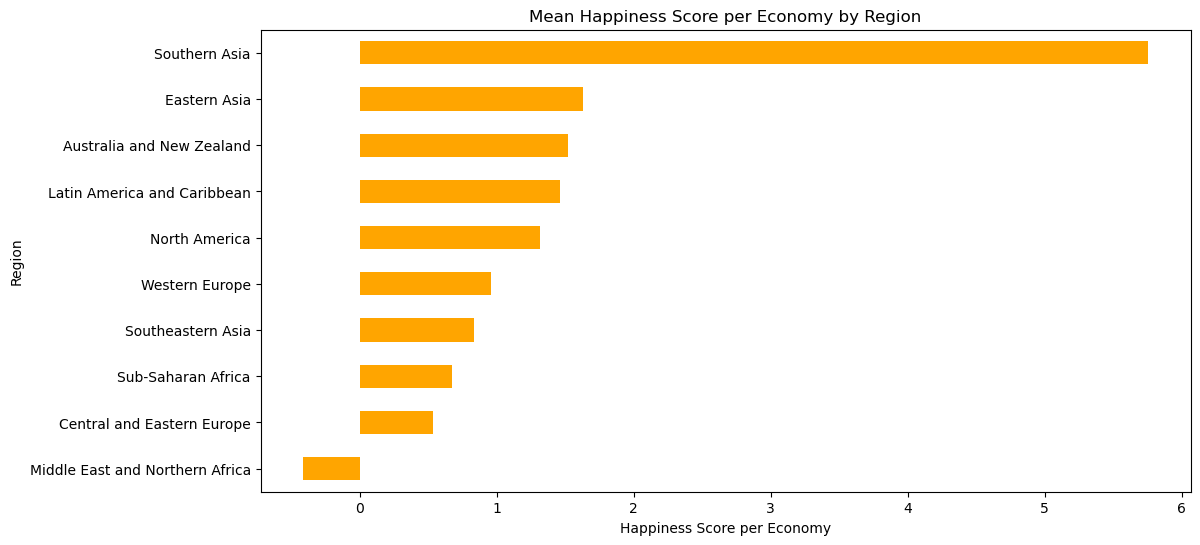

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")

#feature selection

df=df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'
      ]]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'Happiness Score')

# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])

# Drop any unnecessary columns
df.drop(['Dystopia Residual'], axis=1, inplace=True)

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate the happiness score of each country over the economy
df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']

# Group the data by region and calculate the mean happiness score per economy
mean_happiness_per_economy = df.groupby('Region')['Happiness Score per Economy'].mean()

# Plot the mean happiness score per economy for each region
plt.figure(figsize=(12,6))
mean_happiness_per_economy.sort_values().plot(kind='barh', color='orange')
plt.title('Mean Happiness Score per Economy by Region')
plt.xlabel('Happiness Score per Economy')
plt.ylabel('Region')
plt.show()

C:\Users\nh013\AppData\Local\Temp\ipykernel_11592\955210381.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']


Region
Australia and New Zealand          1.521412
Central and Eastern Europe         0.534113
Eastern Asia                       1.632288
Latin America and Caribbean        1.457178
Middle East and Northern Africa   -0.417653
North America                      1.311643
Southeastern Asia                  0.830399
Southern Asia                      5.757188
Sub-Saharan Africa                 0.672296
Western Europe                     0.954176
Name: Happiness Score per Economy, dtype: float64


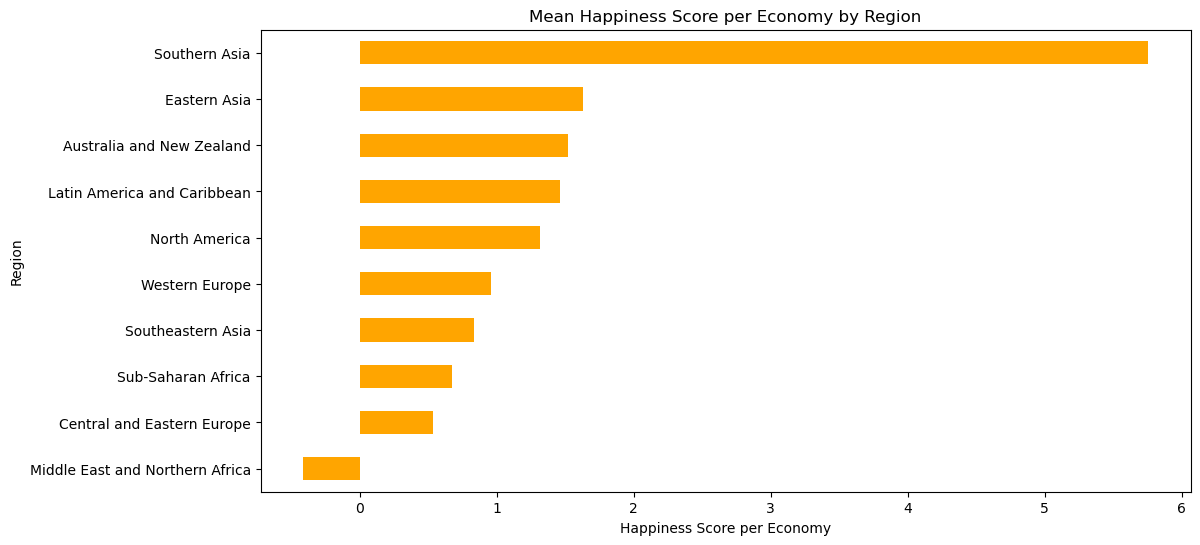

In [28]:
# Calculate the happiness score of each country over the economy
#groupby method to group the data by region and then calculate the mean happiness score per economy for each region. 

# Plot the mean happiness score per economy for each region

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")

#feature selection

df=df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'
      ]]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'Happiness Score')

# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate the happiness score of each country over the economy
df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']

# Group the data by region and calculate the mean happiness score per economy
mean_happiness_per_economy = df.groupby('Region')['Happiness Score per Economy'].mean()

# Print the mean happiness score per economy for each region
print(mean_happiness_per_economy)


# Plot the mean happiness score per economy for each region
plt.figure(figsize=(12,6))
mean_happiness_per_economy.sort_values().plot(kind='barh', color='orange')
plt.title('Mean Happiness Score per Economy by Region')
plt.xlabel('Happiness Score per Economy')
plt.ylabel('Region')
plt.show()


C:\Users\nh013\AppData\Local\Temp\ipykernel_11592\1651934186.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']
C:\Users\nh013\AppData\Local\Temp\ipykernel_11592\1651934186.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)


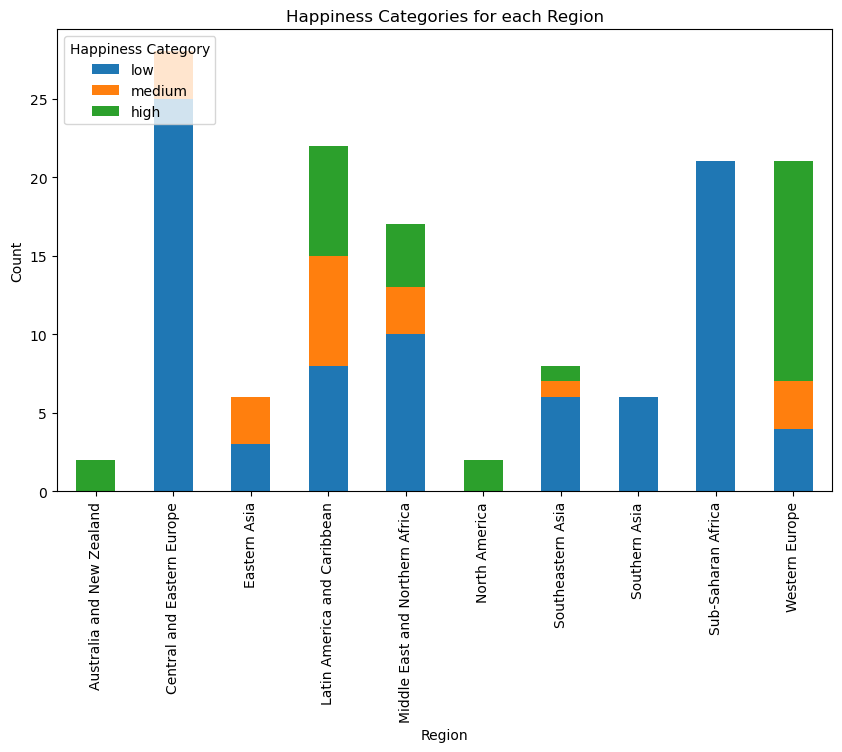

In [29]:
#generate a stacked bar chart with the happiness categories (low, medium, high) for each region
#perform  binning feature engineering for  group the happiness score into different bins, for example, low, medium, and high.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")

# Feature selection
df = df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'Happiness Score')

# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])

# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate the happiness score of each country over the economy
df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']

# Bin the happiness score into different categories (low, medium, high)
bins = [-1, 0.5, 1, 2]
labels = ['low', 'medium', 'high']
df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)

# Group the data by region and happiness category
grouped_data = df.groupby(['Region', 'Happiness Category']).size().unstack(fill_value=0)

# Plot a stacked bar chart of the happiness categories for each region
grouped_data.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Happiness Categories for each Region')
plt.legend(loc='upper left', title='Happiness Category')
plt.show()
